## Análise de Sentimentos em Dados do Twitter sobre o Governo de Minas.

### Importando libs  e funções

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

### Etapa de exploração e tratamento dos dados

Importanto os dados.
Fonte: https://github.com/minerandodados/mdrepo


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/intelligentagents/aprendizagem-supervisionada/master/data/tweets.csv', encoding ='utf-8')

In [3]:
df.head(5)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [4]:
df.describe()

,Unnamed: 0,Geo Coordinates.latitude,Geo Coordinates.longitude,Retweet Count
count,8198.000000,104.000000,104.000000,8198.000000
mean,4098.751403,-42.964716,-19.530204,43.343498
std,2367.029095,1.399314,1.037815,123.376115
min,0.000000,-46.643035,-23.493237,0.000000
25%,2049.250000,-43.941907,-19.914265,0.000000
50%,4098.500000,-41.971876,-18.879871,0.000000
75%,6148.750000,-41.943662,-18.859150,11.000000
max,8198.000000,-41.560230,-18.568089,1940.000000


Visualizando o dataset:

<AxesSubplot:xlabel='Classificacao', ylabel='count'>

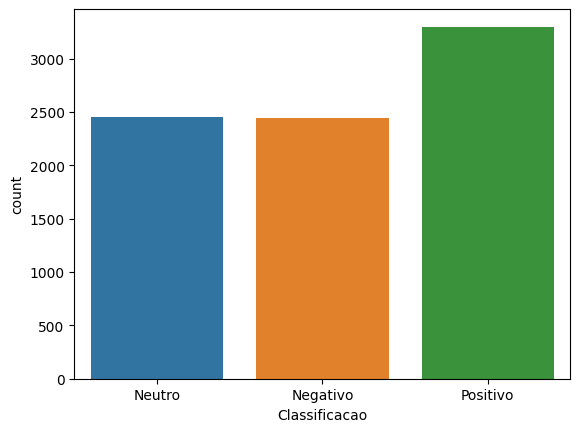

In [5]:
sns.countplot(x= 'Classificacao',data = df)

Processo de tratamento do texto:

![Image](https://drive.google.com/open?id=1jPjuzOCJAASIUgRPHwFnnF0e7eoeXJIB)

Definição das váriaveis dependentes e indepentes: Tweets e classificação do sentimento da mensagem:

In [6]:
X = df['Text'].values
y = df['Classificacao'].values

Criação de um vetor que irá calcular a frequencia de todas as palavras 


In [7]:
vectorizer = CountVectorizer(ngram_range=(1,2))

Converter o texto em uma matriz de contagens de tokens


In [8]:
freq_tweets = vectorizer.fit_transform(X)

### Etapa de treinamento e avaliação do modelo

Dividindo os dados:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(freq_tweets, y, test_size=0.20, random_state=42)

Treinando o algoritmo Naive Bayes:

In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

ANalisando a acuração do modelo com a validação cruzada usando 10 folds:

In [11]:
results = cross_val_predict(model, X_test, y_test, cv=10)

In [12]:
metrics.accuracy_score(y_test, results)

0.9359756097560976

ANalisando os resultados de todas as classes:

In [13]:
print(metrics.classification_report(y_test,results,['Positivo','Negativo','Neutro']))

TypeError: classification_report() takes 2 positional arguments but 3 were given